# Multiple Linear Regression
Now we turn to use Multiple Linear Regression to make prediction. Same as before, we still use auto-mpg dataset to predict ***mpg***.

In [3]:
import numpy as np
import pandas as pd

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
df = df.dropna()
df = df.reset_index(drop=True)

After removing incomplete sample, we import five features as input: 'Horsepower','Cylinders','Displacement','Weight','Acceleration'.

In [8]:
##TODO: remember to convert into numpy
XX=

Let us have a sanity check the dimension of input:

In [9]:
XX.shape

(392, 5)

To make sure you understand how Sklearn works and makes the prediction, we now formulate our own $A$ and $y$ in closed form solution: $inv(A'A)*(A'y)$, where A is expanded input when we count the bias.

In [10]:
##TODO: set the expanded input for calculation manually
A =

In [11]:
A.shape

(392, 6)

We now extract $y$:

In [13]:
##TODO: y is the column of 'MPG':
y=df['MPG'].to_numpy()

For sklearn package, they are packed very well and assume you are a kid, which means you simply input vanilla input instead of expanded input to fit the model. In fact, their fit function will automatically add ones column for further process.

In [14]:
from sklearn.linear_model import LinearRegression
##TODO:
reg =

Now let's check the coefficient and intercept learned via sklearn.

In [15]:
reg.coef_

array([-4.52570802e-02, -3.97928359e-01, -8.31301222e-05, -5.18691735e-03,
       -2.91047140e-02])

In [16]:
reg.intercept_

np.float64(46.26430785257131)

We check the $R^2$ which is a metric evaluating how good our fitting model is. Recall what we have for simple linear regression model where we only use a single input, we got a score around 0.606.

In [18]:
reg.score(XX,y)

0.7076926326770516

From what we have above, we see clearly that Multiple Linear regression model's score is higher than the previous, which validates our intuition: the more information we have, the better performance potentially we can get. Now we turn to use the magical formulation to predict the weights and intercept in ONE shot: 𝑖𝑛𝑣(𝐴′𝐴)∗(𝐴′𝑦)

In [19]:
##TODO: output 𝑖𝑛𝑣(𝐴′𝐴)∗(𝐴′𝑦)

array([ 4.62643079e+01, -4.52570802e-02, -3.97928359e-01, -8.31301222e-05,
       -5.18691735e-03, -2.91047140e-02])

Let's check what about if we don't need bias term.

In [20]:
from sklearn.linear_model import LinearRegression
##TODO: disable the intercept term in the model
reg =

In [21]:
reg.score(XX,y)

0.48022728892039956

In [22]:
reg.coef_

array([ 0.14004165,  2.38827995, -0.06232485, -0.00665363,  1.76156268])

In [23]:
reg.intercept_

0.0

And we compare with closed solution $𝑖𝑛𝑣(𝐴′𝐴)∗(𝐴′𝑦)$ where $A$ now changes to non-expanded matrix $XX$.

In [24]:
##TODO:

array([ 0.14004165,  2.38827995, -0.06232485, -0.00665363,  1.76156268])

Now we turn to make use of polynomial feature to make prediction, where the original feature is 'Horsepower' while we use quadratic model to fit the samples.

In [25]:
##TODO:
X_hp=

In [26]:
y=df['MPG'].to_numpy()

Please refer to [sklearn link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) to get poly features. The original input is x will be transformed into (x,x^2).

In [31]:
from sklearn.preprocessing import PolynomialFeatures

##TODO: we get poly features as X_poly
poly_features =
X_poly =

In [32]:
X_poly.shape

(392, 2)

In [33]:
y.shape

(392,)

In [34]:
lin_reg = LinearRegression()
##TODO: fit the model and output intercept and coeffcients

(np.float64(56.90009970211294), array([-0.46618963,  0.00123054]))

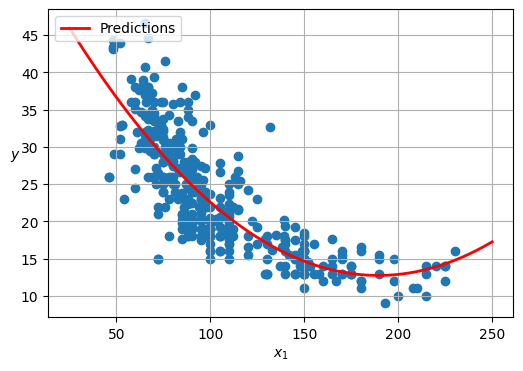

In [36]:
import matplotlib.pyplot as plt
X_new = np.linspace(25, 250, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.scatter(X_hp, y)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.grid()

plt.show()

In [37]:
lin_reg.score(X_poly,y)

0.6875590305127516

In [38]:
X_hp.shape

(392, 1)

We are to generate expanded input feature matrix counting the bias for closed solution:

In [ ]:
##TODO: get the expanded feature matrix as X
X =

In [ ]:
##TODO: compute with inv(X'X)*(X'y)

array([ 5.69000997e+01, -4.66189630e-01,  1.23053610e-03])

We can see it is exactly same as standard sklearn output. Congratulations, this is the end of this part.